In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  #avoid unneccessaty information printed by the model

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error


In [59]:
#load the dataset
data = pd.read_csv("/content/Breast_Cancer.csv")

In [60]:
data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [61]:
#rename columns
data.rename(columns={"Reginol Node Positive":"Regional Node Positive"}, inplace=True)
data.rename(columns={"T Stage ": "T Stage"}, inplace=True)

In [62]:
#datatypes of attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Regional Node Positive  4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [63]:
#check missing values
data.isna().any().any()

False

In [64]:
#check no of unique values in dataset
data.apply(lambda x: len(x.unique()) )

Age                        40
Race                        3
Marital Status              5
T Stage                     4
N Stage                     3
6th Stage                   5
differentiate               4
Grade                       4
A Stage                     2
Tumor Size                110
Estrogen Status             2
Progesterone Status         2
Regional Node Examined     54
Regional Node Positive     38
Survival Months           107
Status                      2
dtype: int64

In [65]:
#Check for categorical attributes
cat_col = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'object':
        cat_col.append(x)

cat_col

['Race',
 'Marital Status',
 'T Stage',
 'N Stage',
 '6th Stage',
 'differentiate',
 'Grade',
 'A Stage',
 'Estrogen Status',
 'Progesterone Status',
 'Status']

In [66]:
#remove unneccesary categorical columns
data = data.drop(['Race', 'Marital Status'], axis = 1)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   T Stage                 4024 non-null   object
 2   N Stage                 4024 non-null   object
 3   6th Stage               4024 non-null   object
 4   differentiate           4024 non-null   object
 5   Grade                   4024 non-null   object
 6   A Stage                 4024 non-null   object
 7   Tumor Size              4024 non-null   int64 
 8   Estrogen Status         4024 non-null   object
 9   Progesterone Status     4024 non-null   object
 10  Regional Node Examined  4024 non-null   int64 
 11  Regional Node Positive  4024 non-null   int64 
 12  Survival Months         4024 non-null   int64 
 13  Status                  4024 non-null   object
dtypes: int64(5), object(9)
memory usage: 440.2+ KB


#GET UNIQUE VALUES

In [68]:
data['Age'].unique()

array([68, 50, 58, 47, 51, 40, 69, 46, 65, 48, 62, 61, 56, 43, 60, 57, 55,
       63, 66, 53, 59, 54, 49, 64, 42, 37, 67, 31, 52, 33, 45, 38, 39, 36,
       41, 44, 32, 34, 35, 30])

In [69]:
data['T Stage'].unique()

array(['T1', 'T2', 'T3', 'T4'], dtype=object)

In [70]:
data['N Stage'].unique()

array(['N1', 'N2', 'N3'], dtype=object)

In [71]:
data['6th Stage'].unique()

array(['IIA', 'IIIA', 'IIIC', 'IIB', 'IIIB'], dtype=object)

In [72]:
data['differentiate'].unique()

array(['Poorly differentiated', 'Moderately differentiated',
       'Well differentiated', 'Undifferentiated'], dtype=object)

In [73]:
data['Grade'].unique()

array(['3', '2', '1', ' anaplastic; Grade IV'], dtype=object)

In [74]:
data['A Stage'].unique()

array(['Regional', 'Distant'], dtype=object)

In [75]:
data['Tumor Size'].unique()

array([  4,  35,  63,  18,  41,  20,   8,  30, 103,  32,  13,  59,  15,
        19,  46,  24,  25,  29,  40,  70,  22,  50,  17,  21,  10,  27,
        23,   5,  51,   9,  55, 120,  77,   2,  11,  12,  26,  75, 130,
        34,  80,   3,  60,  14,  16,  45,  36,  76,  38,  49,   7,  72,
       100,  43,  62,  37,  68,  52,  85,  57,  39,  28,  48, 110,  65,
         6, 105, 140,  42,  31,  90, 108,  98,  47,  54,  61,  74,  33,
         1,  87,  81,  58, 117,  44, 123, 133,  95, 107,  92,  69,  56,
        82,  66,  78,  97,  88,  53,  83, 101,  84, 115,  73, 125, 104,
        94,  86,  64,  96,  79,  67])

In [76]:
data['Estrogen Status'].unique()

array(['Positive', 'Negative'], dtype=object)

In [77]:
data['Progesterone Status'].unique()

array(['Positive', 'Negative'], dtype=object)

In [78]:
data['Regional Node Examined'].unique()

array([24, 14,  2,  3, 18, 11,  9, 20, 21, 13, 23, 16,  1, 22, 15,  4, 26,
       31, 25, 10,  5,  6, 19, 12,  8, 17,  7, 49, 33, 30, 34, 28, 32, 27,
       42, 29, 41, 39, 46, 40, 51, 44, 38, 47, 54, 36, 61, 37, 35, 43, 52,
       45, 57, 60])

In [79]:
data['Regional Node Positive'].unique()

array([ 1,  5,  7,  2, 18, 12,  3, 14, 22, 17, 23,  4, 10,  6,  9,  8, 20,
       16, 13, 11, 24, 27, 21, 26, 15, 28, 19, 29, 31, 46, 33, 37, 30, 35,
       25, 32, 41, 34])

In [80]:
data['Survival Months'].unique()

array([ 60,  62,  75,  84,  50,  89,  54,  14,  70,  92,  64,  56,  38,
        49, 105, 107,  77,  81,  78, 102,  98,  82,  86,  52,  90,  31,
        37, 103,  42,  61,  63,  39,  59,  71,  74,  73,  91, 106,  80,
        44,  85,  79, 104,  12,  95,  55, 101,  65,  72,  57,  87,  40,
        25,   8,  53,  58,  24,  66,  69,  93,  94, 100,  96,  41,  67,
        51,  13,  11,  47,  23,  45,  68,  76,  15,  16,  99,   7,  48,
        88,  34,  97,  83,  17,   3,  22,  30,   6,  32,   9,   5,  10,
        19,  18,  35,  27,  36,   4,  29,  33,  26,  20,  28,  43,   1,
        46,  21,   2])

In [81]:
data['Status'].unique()

array(['Alive', 'Dead'], dtype=object)

#Replace catogorical values with numerical val

In [82]:
data["Grade"].replace({" anaplastic; Grade IV": "4"}, inplace=True)
data["Grade"] = data["Grade"].astype(int)
data["T Stage"].replace({"T1":1, "T2": 2, "T3":3, "T4": 4}, inplace=True)
data["N Stage"].replace({"N1":1, "N2": 2, "N3":3}, inplace=True)
data["6th Stage"].replace({"IIA":1, "IIB": 2, "IIIA":3, "IIIB": 4,"IIIC":5}, inplace=True)
data["differentiate"].replace({"Moderately differentiated": 2,
                            "Poorly differentiated": 1,
                            "Well differentiated": 3,
                            "Undifferentiated": 0}, inplace=True)
data["A Stage"].replace({"Regional":1, "Distant": 0}, inplace=True)
data["Estrogen Status"].replace({"Positive":1, "Negative": 0}, inplace=True)
data["Progesterone Status"].replace({"Positive":1, "Negative": 0}, inplace=True)
data["Status"].replace({"Alive":1, "Dead": 0}, inplace=True)


In [83]:
data

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,68,1,1,1,1,3,1,4,1,1,24,1,60,1
1,50,2,2,3,2,2,1,35,1,1,14,5,62,1
2,58,3,3,5,2,2,1,63,1,1,14,7,75,1
3,58,1,1,1,1,3,1,18,1,1,2,1,84,1
4,47,2,1,2,1,3,1,41,1,1,3,1,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,1,1,1,2,2,1,9,1,1,1,1,49,1
4020,56,2,2,3,2,2,1,46,1,1,14,8,69,1
4021,68,2,1,2,2,2,1,22,1,0,11,3,69,1
4022,58,2,1,2,2,2,1,44,1,1,11,1,72,1


# Visualize data distributions, correlations, and patterns

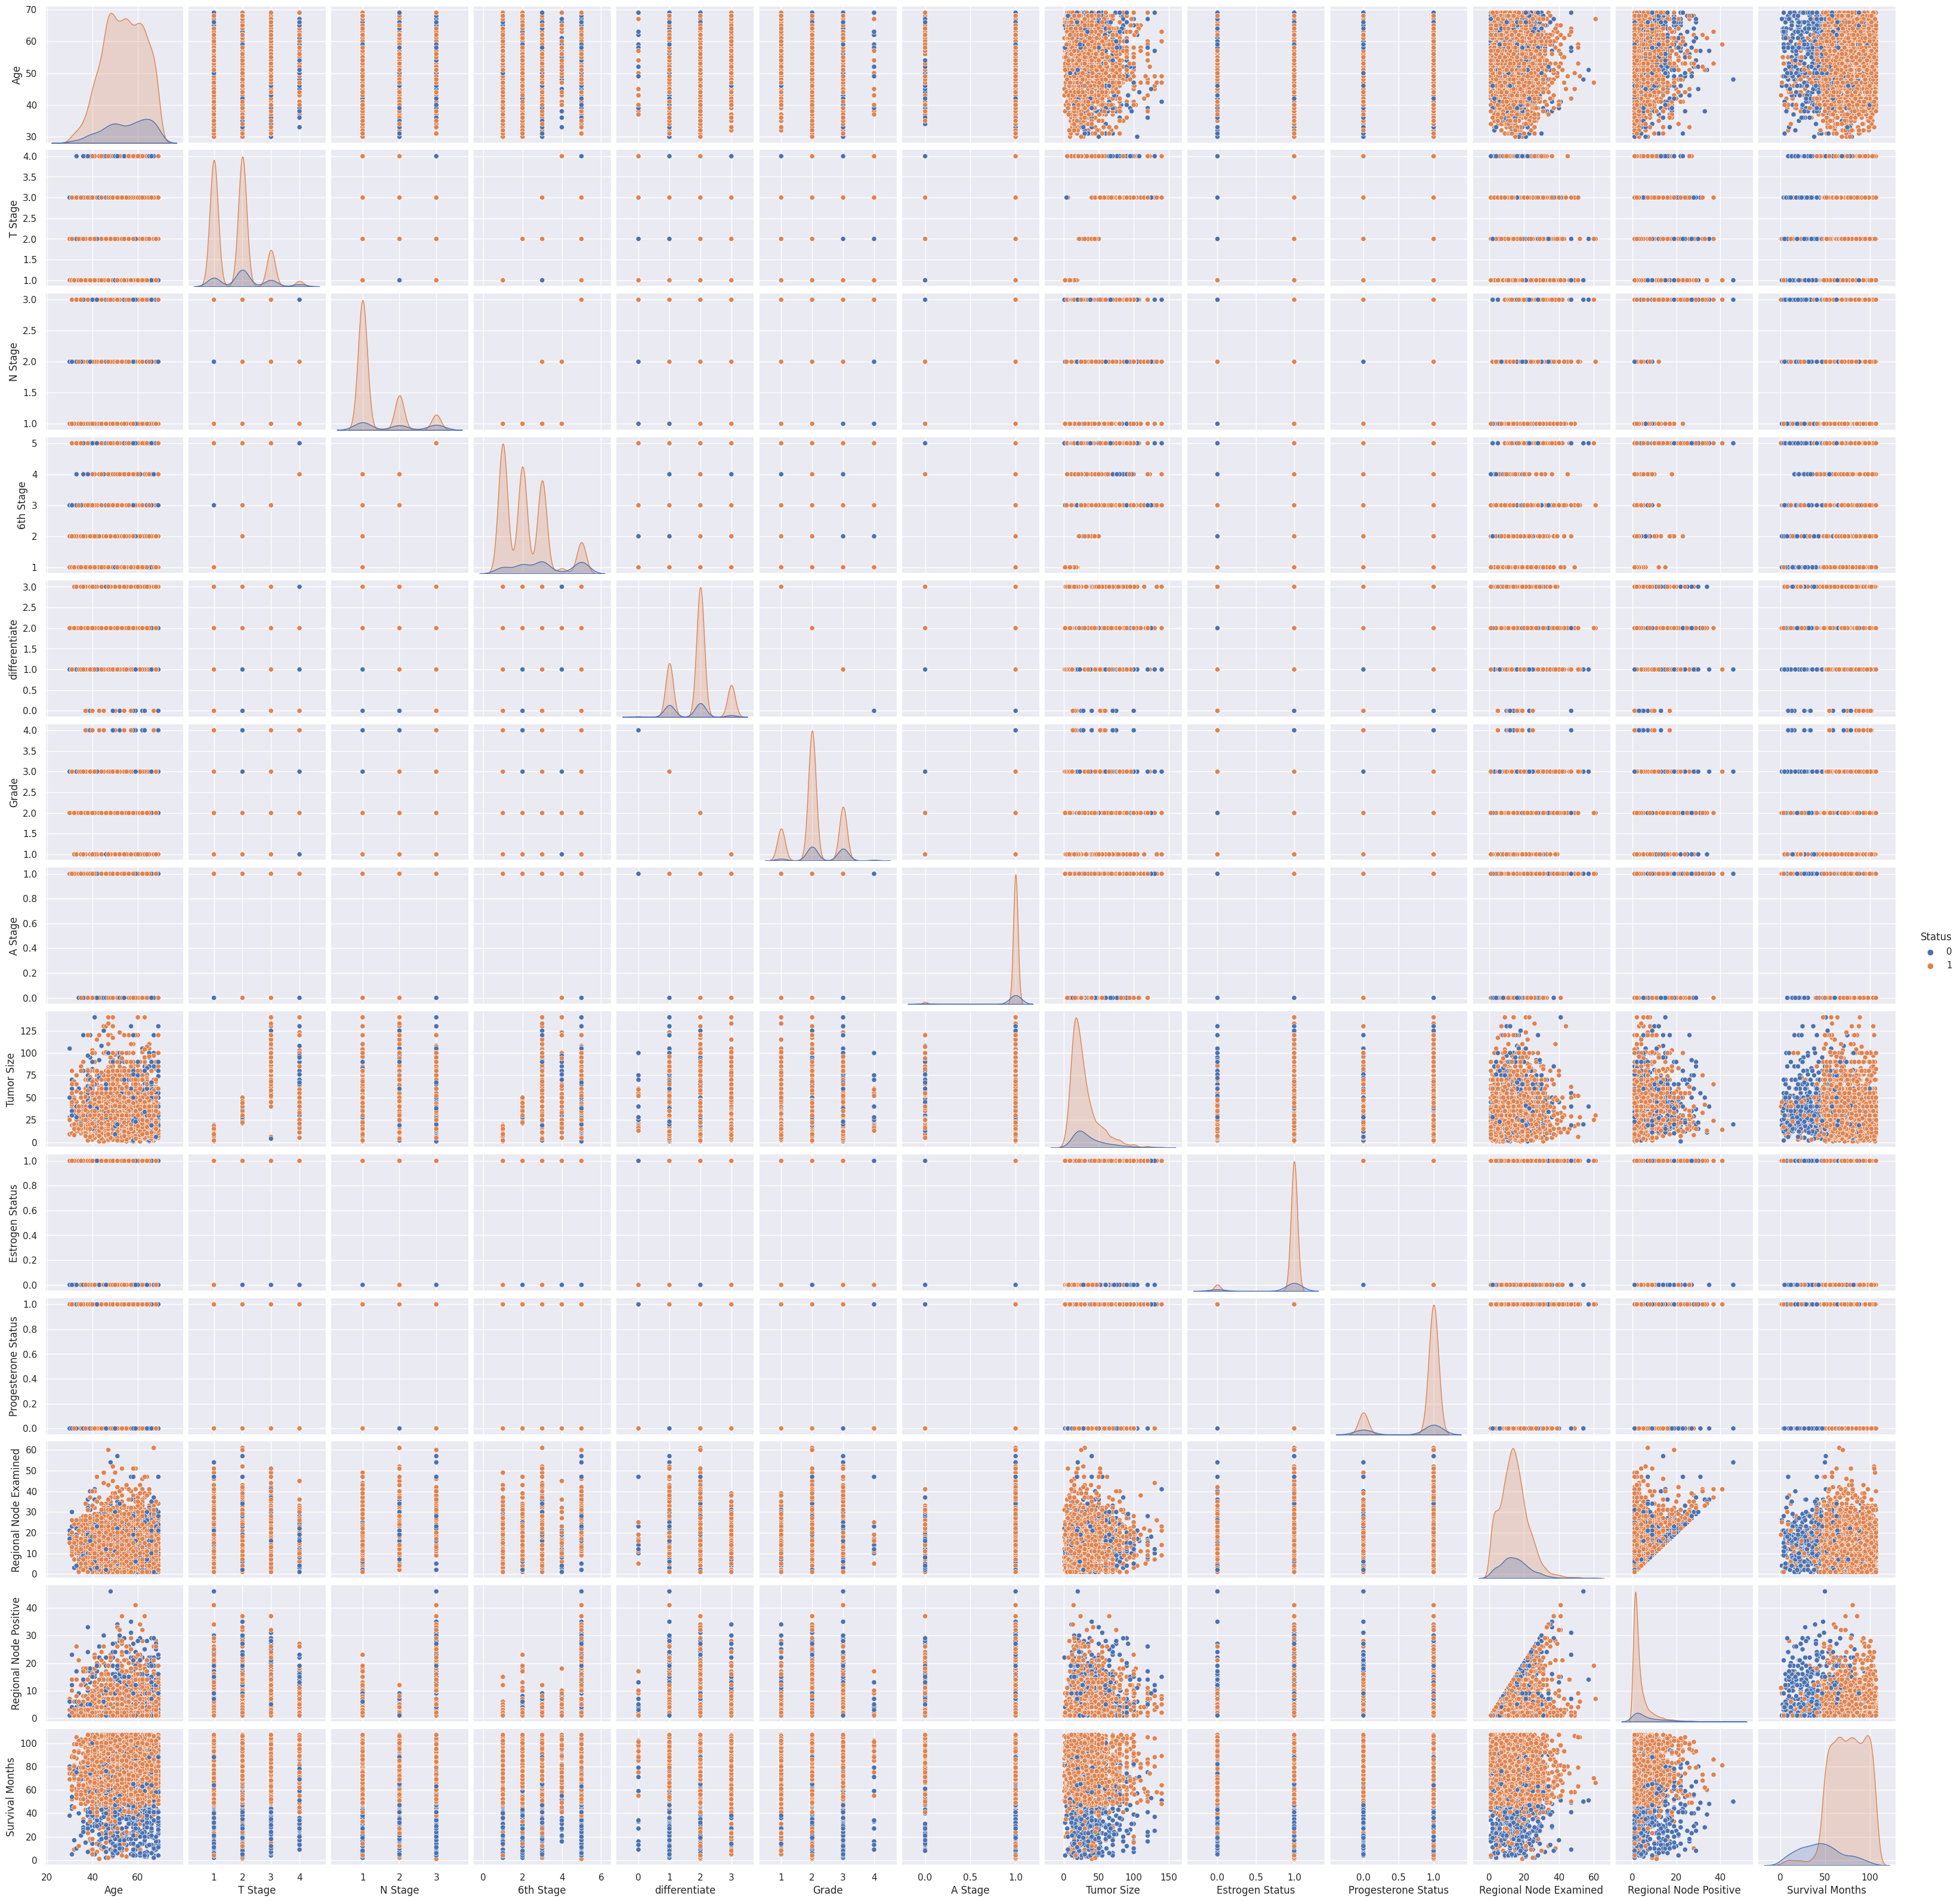

In [84]:
sns.pairplot(data, hue="Status")
plt.show()


In [85]:
#function to check all the features according to whether they are alive(1) or dead(0)

def statuscountplot (df,var):
    sns.countplot(data=df,x=var,hue='Status')
    sns.set(rc={'figure.figsize':(10,8)})
    plt.xticks(rotation=90)
    plt.show()

# Statistical info

In [87]:
temp = data.describe()
temp.style.background_gradient(cmap='Blues')

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,1.784791,1.438370,2.321819,1.849404,2.150596,0.977137,30.473658,0.933151,0.826541,14.357107,4.158052,71.297962,0.846918
std,8.963134,0.765531,0.693479,1.266624,0.638234,0.638234,0.149485,21.119696,0.249791,0.378691,8.099675,5.109331,22.921430,0.360111
min,30.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,47.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,16.000000,1.000000,1.000000,9.000000,1.000000,56.000000,1.000000
50%,54.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,25.000000,1.000000,1.000000,14.000000,2.000000,73.000000,1.000000
75%,61.000000,2.000000,2.000000,3.000000,2.000000,3.000000,1.000000,38.000000,1.000000,1.000000,19.000000,5.000000,90.000000,1.000000
max,69.000000,4.000000,3.000000,5.000000,3.000000,4.000000,1.000000,140.000000,1.000000,1.000000,61.000000,46.000000,107.000000,1.000000


#Correlation between features

<Axes: >

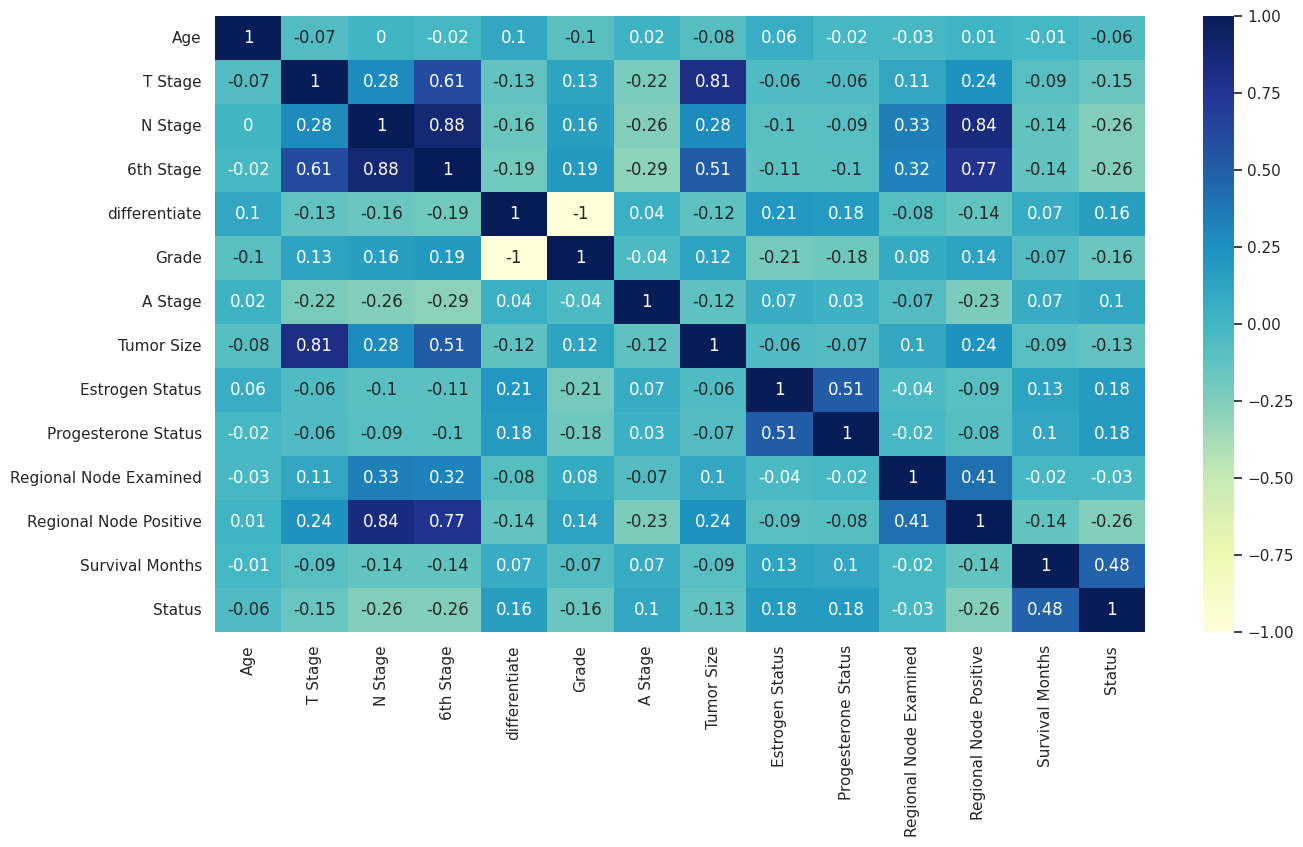

In [88]:
#correlation between features to understand which feature has the most impact on the other

correlation = data.corr().round(2)
plt.figure(figsize = (15,8))
sns.heatmap(correlation, annot = True, cmap = 'YlGnBu')

#Normalization

In [89]:
# Feature Scaling or Normalization
scaler = StandardScaler()
data[["Age", "Tumor Size", "Regional Node Examined", "Regional Node Positive", "Survival Months"]] = scaler.fit_transform(data[["Age", "Tumor Size", "Regional Node Examined", "Regional Node Positive", "Survival Months"]])

#Split

In [90]:
#define inputs and outputs

df1= data.copy()

X = df1.drop(['Status'], axis = 1)
y = df1['Status']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Using random forest classifier

In [92]:
rfmodel=RandomForestClassifier(n_estimators=600)

In [93]:
rfmodel.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [94]:
y_pred=rfmodel.predict(X_test)

#Cross validation

In [95]:
# Specify the number of folds for cross-validation
n_folds = 5
# Create a KFold cross-validation object
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Perform cross-validation and collect scores
cross_val_scores = cross_val_score(rfmodel, X, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, score in enumerate(cross_val_scores, start=1):
    print(f'Fold {fold}: {score:.4f}')

# Calculate the average accuracy
average_accuracy = cross_val_scores.mean()
print(f'Average Accuracy: {average_accuracy:.4f}')

Fold 1: 0.9093
Fold 2: 0.9118
Fold 3: 0.9130
Fold 4: 0.8957
Fold 5: 0.8893
Average Accuracy: 0.9038


# Create a confusion matrix

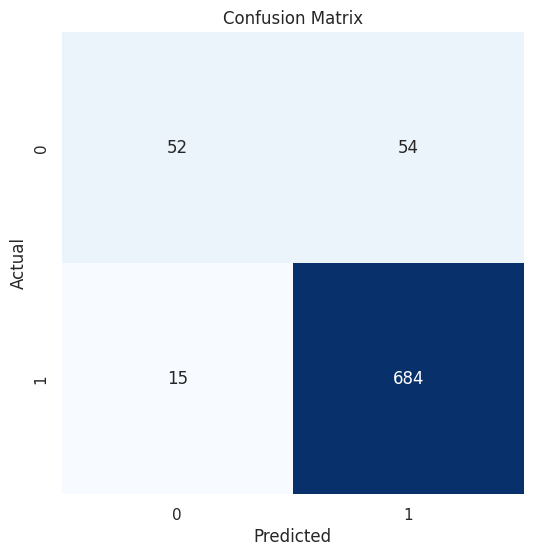

In [107]:
confusion = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", confusion)

plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



#Get the accuracy values

In [97]:
print('Accuracy score: ',accuracy_score(y_test,y_pred))
print('Recall score: ',recall_score(y_test,y_pred))
print('Jaccard score: ',jaccard_score(y_test,y_pred))
print('f1 score: ',f1_score(y_test,y_pred))
print('Precision score: ',precision_score(y_test,y_pred))

Accuracy score:  0.9142857142857143
Recall score:  0.9785407725321889
Jaccard score:  0.9083665338645418
f1 score:  0.9519832985386221
Precision score:  0.926829268292683


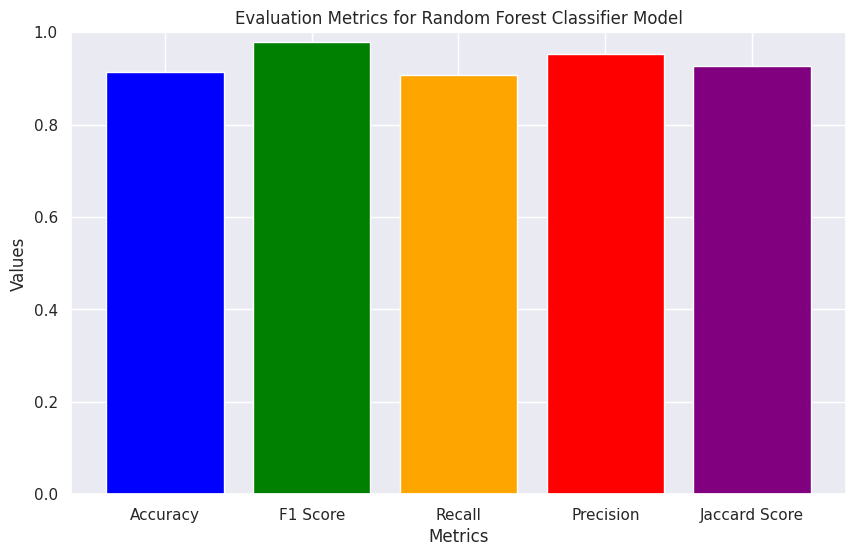

In [108]:
accuracy = accuracy_score(y_test,y_pred)
f1 = recall_score(y_test,y_pred)
recall = jaccard_score(y_test,y_pred)
precision = f1_score(y_test,y_pred)
jaccard = precision_score(y_test,y_pred)


# Create a DataFrame for the metrics
metrics = pd.DataFrame({'Metrics': ['Accuracy', 'F1 Score', 'Recall', 'Precision', 'Jaccard Score'],
                        'Values': [accuracy, f1, recall, precision, jaccard]})

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics['Metrics'], metrics['Values'], color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics for Random Forest Classifier Model')
plt.ylim(0, 1)  # Set y-axis limits to match the range of metric values (0 to 1)
plt.savefig('Scores_plot.jpg')
plt.show()


#Observed vs. predicted status

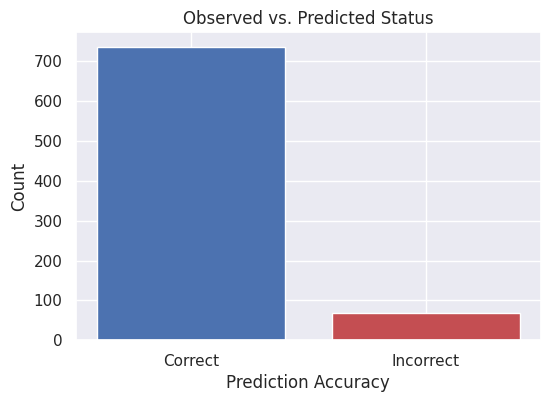

In [101]:
# Calculate the number of correct and incorrect predictions
correct = np.sum(y_test == y_pred)
incorrect = np.sum(y_test != y_pred)

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Correct', 'Incorrect'], [correct, incorrect], color=['b', 'r'])
plt.xlabel('Prediction Accuracy')
plt.ylabel('Count')
plt.title('Observed vs. Predicted Status')
plt.show()

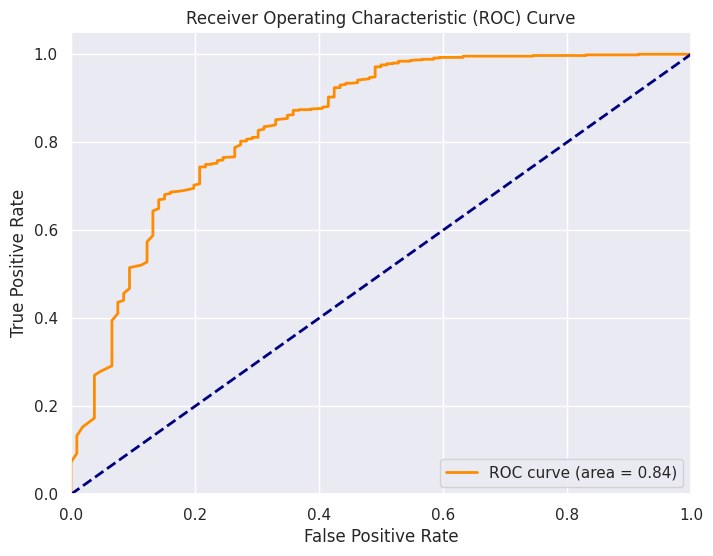

In [109]:
# Calculate ROC curve and AUC
y_prob = rfmodel.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Create ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#Predictions

In [102]:
input_data = np.array([[68, 1, 1, 1, 1, 3, 1, 4, 1, 1, 24, 1, 60]])
predictions = rfmodel.predict(input_data)
print(predictions)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [110]:
# Predict probability of being "alive" (1) for a new data point

new_data = [[68, 1, 1, 1, 1, 3, 1, 4, 1, 1, 24, 1, 60]]
probability_alive = rfmodel.predict_proba(new_data)[:, 1]  # Probability of being "alive"
print(f'Probability of being alive: {probability_alive[0]:.2%}')


Probability of being alive: 72.17%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
